In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
import patsy
import numpy as np

In [2]:
#df = pd.read_csv('/Users/fatimahalshammari/Downloads/iMDB.csv')

In [3]:
url = 'https://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [4]:
movies = soup.select('td.titleColumn')
links = ['https://www.imdb.com'+a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
           for b in soup.select('td.posterColumn span[name=ir]')] 


In [5]:
movies

[<td class="titleColumn">
       1.
       <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
 <span class="secondaryInfo">(1994)</span>
 </td>,
 <td class="titleColumn">
       2.
       <a href="/title/tt0068646/" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">The Godfather</a>
 <span class="secondaryInfo">(1972)</span>
 </td>,
 <td class="titleColumn">
       3.
       <a href="/title/tt0071562/" title="Francis Ford Coppola (dir.), Al Pacino, Robert De Niro">The Godfather: Part II</a>
 <span class="secondaryInfo">(1974)</span>
 </td>,
 <td class="titleColumn">
       4.
       <a href="/title/tt0468569/" title="Christopher Nolan (dir.), Christian Bale, Heath Ledger">The Dark Knight</a>
 <span class="secondaryInfo">(2008)</span>
 </td>,
 <td class="titleColumn">
       5.
       <a href="/title/tt0050083/" title="Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb">12 Angry Men</a>
 <span class="secondaryInfo">

In [6]:
links

['https://www.imdb.com/title/tt0111161/',
 'https://www.imdb.com/title/tt0068646/',
 'https://www.imdb.com/title/tt0071562/',
 'https://www.imdb.com/title/tt0468569/',
 'https://www.imdb.com/title/tt0050083/',
 'https://www.imdb.com/title/tt0108052/',
 'https://www.imdb.com/title/tt0167260/',
 'https://www.imdb.com/title/tt0110912/',
 'https://www.imdb.com/title/tt0060196/',
 'https://www.imdb.com/title/tt0120737/',
 'https://www.imdb.com/title/tt0137523/',
 'https://www.imdb.com/title/tt0109830/',
 'https://www.imdb.com/title/tt1375666/',
 'https://www.imdb.com/title/tt0167261/',
 'https://www.imdb.com/title/tt0080684/',
 'https://www.imdb.com/title/tt0133093/',
 'https://www.imdb.com/title/tt0099685/',
 'https://www.imdb.com/title/tt0073486/',
 'https://www.imdb.com/title/tt0047478/',
 'https://www.imdb.com/title/tt0114369/',
 'https://www.imdb.com/title/tt0102926/',
 'https://www.imdb.com/title/tt0317248/',
 'https://www.imdb.com/title/tt0118799/',
 'https://www.imdb.com/title/tt003

In [7]:
list = []
for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    print(movie)
    movie_title = movie[len(str(index))+1:-7]
    director = re.search('[a-zA-Z_ ]+ \(dir.\)',crew[index]).group(0)
    year = re.search('\((.*?)\)', movie_string).group(1)
    data = {"movie_title": movie_title,
            "year": year,
            "director": director,
            "rating": ratings[index],
            "link": links[index]}
    list.append(data)

1 The Shawshank Redemption (1994)
2 The Godfather (1972)
3 The Godfather: Part II (1974)
4 The Dark Knight (2008)
5 12 Angry Men (1957)
6 Schindler's List (1993)
7 The Lord of the Rings: The Return of the King (2003)
8 Pulp Fiction (1994)
9 Il buono, il brutto, il cattivo (1966)
10 The Lord of the Rings: The Fellowship of the Ring (2001)
11 Fight Club (1999)
12 Forrest Gump (1994)
13 Inception (2010)
14 The Lord of the Rings: The Two Towers (2002)
15 Star Wars: Episode V - The Empire Strikes Back (1980)
16 The Matrix (1999)
17 Goodfellas (1990)
18 One Flew Over the Cuckoo's Nest (1975)
19 Shichinin no samurai (1954)
20 Se7en (1995)
21 The Silence of the Lambs (1991)
22 Cidade de Deus (2002)
23 La vita è bella (1997)
24 It's a Wonderful Life (1946)
25 Star Wars (1977)
26 Saving Private Ryan (1998)
27 Interstellar (2014)
28 Sen to Chihiro no kamikakushi (2001)
29 The Green Mile (1999)
30 Gisaengchung (2019)
31 Léon (1994)
32 Seppuku (1962)
33 The Pianist (2002)
34 The Usual Suspects (199

In [8]:
list

[{'movie_title': 'The Shawshank Redemption',
  'year': '1994',
  'director': 'Frank Darabont (dir.)',
  'rating': '9.22049564400595',
  'link': 'https://www.imdb.com/title/tt0111161/'},
 {'movie_title': 'The Godfather',
  'year': '1972',
  'director': 'Francis Ford Coppola (dir.)',
  'rating': '9.147185904964319',
  'link': 'https://www.imdb.com/title/tt0068646/'},
 {'movie_title': 'The Godfather: Part II',
  'year': '1974',
  'director': 'Francis Ford Coppola (dir.)',
  'rating': '8.980477003388666',
  'link': 'https://www.imdb.com/title/tt0071562/'},
 {'movie_title': 'The Dark Knight',
  'year': '2008',
  'director': 'Christopher Nolan (dir.)',
  'rating': '8.972829182939684',
  'link': 'https://www.imdb.com/title/tt0468569/'},
 {'movie_title': '12 Angry Men',
  'year': '1957',
  'director': 'Sidney Lumet (dir.)',
  'rating': '8.938825608224043',
  'link': 'https://www.imdb.com/title/tt0050083/'},
 {'movie_title': "Schindler's List",
  'year': '1993',
  'director': 'Steven Spielberg 

In [9]:
for movie in list:
    print(movie['movie_title'], '('+movie['year'],'Starring:', movie['director'], movie['rating'])

The Shawshank Redemption (1994 Starring: Frank Darabont (dir.) 9.22049564400595
The Godfather (1972 Starring: Francis Ford Coppola (dir.) 9.147185904964319
The Godfather: Part II (1974 Starring: Francis Ford Coppola (dir.) 8.980477003388666
The Dark Knight (2008 Starring: Christopher Nolan (dir.) 8.972829182939684
12 Angry Men (1957 Starring: Sidney Lumet (dir.) 8.938825608224043
Schindler's List (1993 Starring: Steven Spielberg (dir.) 8.911050505036783
The Lord of the Rings: The Return of the King (2003 Starring: Peter Jackson (dir.) 8.888127139381691
Pulp Fiction (1994 Starring: Quentin Tarantino (dir.) 8.836148645820783
Il buono, il brutto, il cattivo (1966 Starring: Sergio Leone (dir.) 8.78652377203326
 The Lord of the Rings: The Fellowship of the Ring (2001 Starring: Peter Jackson (dir.) 8.778331874279896
Fight Club (1999 Starring: David Fincher (dir.) 8.75251719894405
Forrest Gump (1994 Starring: Robert Zemeckis (dir.) 8.743861249326343
Inception (2010 Starring: Christopher Nolan

In [10]:
df = pd.DataFrame(list, columns=[ 'movie_title', 'year', 'director', 'rating'])


In [48]:
type=[]
hours=[]
user_reviews=[]
critic_reviews = []
for l in links:
    url = l
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    hours.append(soup.find('ul', class_='ipc-inline-list ipc-inline-list--show-dividers TitleBlockMetaData__MetaDataList-sc-12ein40-0 dxizHm baseAlt').find_all('li', class_= 'ipc-inline-list__item')[-1].text)
    user_reviews.append(soup.find('span',class_='score').text)
    critic_reviews.append(soup.find_all('span',class_='score')[1].text)
    typeOfMovie = soup.find_all('span', class_='TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex')
    if len(typeOfMovie)>1:
        type.append(typeOfMovie[1].text)
    else:
        type.append(np.nan)

In [49]:
for idx,i in enumerate(user_reviews):
    if 'K' in i:
        i=i.replace('K','')
        if '.' in i:
            numP = i.split('.')
            user_reviews[idx] = float(numP[0])*1000+float(numP[1])*100
        else:
            user_reviews[idx] = float(i)*1000
    else:
        user_reviews[idx] = float(i)

In [50]:
for idx,i in enumerate(hours):
    h = i.split()
    print(h)
    hour = 0
    if 'h' in i:
        hour = float(h[0].replace('h',''))*60
    minu = 0
    if 'min' in i:
        if len(h)>1:
            minu = float(h[1].replace('min',''))
        else:
            minu = float(h[0].replace('min',''))
    hours[idx] = hour + minu
    print(hours[idx])

['2h', '22min']
142.0
['2h', '55min']
175.0
['3h', '22min']
202.0
['2h', '32min']
152.0
['1h', '36min']
96.0
['3h', '15min']
195.0
['3h', '21min']
201.0
['2h', '34min']
154.0
['2h', '41min']
161.0
['2h', '58min']
178.0
['2h', '19min']
139.0
['2h', '22min']
142.0
['2h', '28min']
148.0
['2h', '59min']
179.0
['2h', '4min']
124.0
['2h', '16min']
136.0
['2h', '26min']
146.0
['2h', '13min']
133.0
['3h', '27min']
207.0
['2h', '7min']
127.0
['1h', '58min']
118.0
['2h', '10min']
130.0
['1h', '56min']
116.0
['2h', '10min']
130.0
['2h', '1min']
121.0
['2h', '49min']
169.0
['2h', '49min']
169.0
['2h', '5min']
125.0
['3h', '9min']
189.0
['2h', '12min']
132.0
['1h', '50min']
110.0
['2h', '13min']
133.0
['2h', '30min']
150.0
['1h', '46min']
106.0
['2h', '17min']
137.0
['1h', '56min']
116.0
['1h', '49min']
109.0
['1h', '28min']
88.0
['1h', '27min']
87.0
['1h', '59min']
119.0
['1h', '27min']
87.0
['1h', '29min']
89.0
['1h', '46min']
106.0
['2h', '35min']
155.0
['2h', '31min']
151.0
['1h', '52min']
112.

In [51]:
df.isna().sum()
hours

[142.0,
 175.0,
 202.0,
 152.0,
 96.0,
 195.0,
 201.0,
 154.0,
 161.0,
 178.0,
 139.0,
 142.0,
 148.0,
 179.0,
 124.0,
 136.0,
 146.0,
 133.0,
 207.0,
 127.0,
 118.0,
 130.0,
 116.0,
 130.0,
 121.0,
 169.0,
 169.0,
 125.0,
 189.0,
 132.0,
 110.0,
 133.0,
 150.0,
 106.0,
 137.0,
 116.0,
 109.0,
 88.0,
 87.0,
 119.0,
 87.0,
 89.0,
 106.0,
 155.0,
 151.0,
 112.0,
 130.0,
 102.0,
 165.0,
 112.0,
 155.0,
 117.0,
 147.0,
 113.0,
 115.0,
 125.0,
 137.0,
 165.0,
 88.0,
 110.0,
 98.0,
 149.0,
 146.0,
 116.0,
 117.0,
 95.0,
 122.0,
 134.0,
 120.0,
 106.0,
 229.0,
 164.0,
 137.0,
 105.0,
 126.0,
 160.0,
 181.0,
 149.0,
 143.0,
 122.0,
 81.0,
 170.0,
 160.0,
 178.0,
 153.0,
 126.0,
 131.0,
 149.0,
 99.0,
 117.0,
 165.0,
 128.0,
 119.0,
 142.0,
 115.0,
 102.0,
 103.0,
 155.0,
 136.0,
 125.0,
 108.0,
 143.0,
 89.0,
 228.0,
 68.0,
 116.0,
 161.0,
 97.0,
 136.0,
 125.0,
 153.0,
 114.0,
 131.0,
 107.0,
 129.0,
 123.0,
 170.0,
 119.0,
 104.0,
 122.0,
 103.0,
 129.0,
 132.0,
 96.0,
 127.0,
 138.0,
 170.0

In [52]:
Movie_info_type=pd.DataFrame(type, columns=['Motion_Rating'])
Movie_info_hour=pd.DataFrame(hours, columns=['Length'])
critic_reviews = pd.DataFrame(critic_reviews, columns=['critic_reviews'])
user_reviews = pd.DataFrame(user_reviews, columns=['user_reviews'])
df7=pd.concat([df,Movie_info_type,Movie_info_hour,critic_reviews,user_reviews],axis=1)

In [53]:
user_reviews

,user_reviews
0,9500.0
1,4600.0
2,1200.0
3,7600.0
4,1800.0
...,...
245,918.0
246,534.0
247,141.0
248,115.0


In [54]:
df7['critic_reviews'] = df7['critic_reviews'].astype(float)

In [55]:
df7.to_csv('iMDB_dataset.csv', index=False)

In [56]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     250 non-null    object 
 1   year            250 non-null    float64
 2   director        250 non-null    object 
 3   rating          250 non-null    float64
 4   Motion_Rating   248 non-null    object 
 5   Length          250 non-null    float64
 6   critic_reviews  250 non-null    float64
 7   user_reviews    250 non-null    float64
dtypes: float64(5), object(3)
memory usage: 15.8+ KB


In [57]:
len(df['movie_title'])

250

In [58]:
len(df['year'])

250

In [59]:
len(df['director'])

250

In [60]:
len(df['rating'])

250

In [61]:
#pd.get_dummies(df)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  250 non-null    object 
 1   year         250 non-null    float64
 2   director     250 non-null    object 
 3   rating       250 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.9+ KB


In [63]:
df['year'] = df['year'].astype(float)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  250 non-null    object 
 1   year         250 non-null    float64
 2   director     250 non-null    object 
 3   rating       250 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.9+ KB


In [65]:
df['rating'] = df['rating'].astype(float)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  250 non-null    object 
 1   year         250 non-null    float64
 2   director     250 non-null    object 
 3   rating       250 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.9+ KB


In [67]:
dir = pd.get_dummies(df['director'])

In [68]:
dum_dir = pd.concat([df, dir], axis=1)

In [69]:
dum_dir    

,movie_title,year,director,rating,Avildsen (dir.),Campanella (dir.),Mankiewicz (dir.),Murnau (dir.),Night Shyamalan (dir.),Ozu (dir.),...,Wes Anderson (dir.),William Wyler (dir.),Wim Wenders (dir.),Wolfgang Petersen (dir.),Wook (dir.),Yavuz Turgul (dir.),m (dir.),n Szifron (dir.),ois Truffaut (dir.),rritu (dir.)
0,The Shawshank Redemption,1994.0,Frank Darabont (dir.),9.220496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972.0,Francis Ford Coppola (dir.),9.147186,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,1974.0,Francis Ford Coppola (dir.),8.980477,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,2008.0,Christopher Nolan (dir.),8.972829,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,1957.0,Sidney Lumet (dir.),8.938826,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Princess Bride,1987.0,Rob Reiner (dir.),8.022623,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,Ratsasan,2018.0,Ram Kumar (dir.),8.022075,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,Du rififi chez les hommes,1955.0,Jules Dassin (dir.),8.020968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,Le notti di Cabiria,1957.0,Federico Fellini (dir.),8.020030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#tit = pd.get_dummies(df['movie_title'])

In [34]:
#dum_tit = pd.concat([df, tit], axis=1)

In [35]:
#dum_tit 

Drop the movie title column because it require dummy and when apply the dummy then the columns will be a lot

In [36]:
dum_dir.drop('movie_title', axis='columns', inplace=True)

In [37]:
dum_dir

,year,director,rating,Avildsen (dir.),Campanella (dir.),Mankiewicz (dir.),Murnau (dir.),Night Shyamalan (dir.),Ozu (dir.),Aamir Khan (dir.),...,Wes Anderson (dir.),William Wyler (dir.),Wim Wenders (dir.),Wolfgang Petersen (dir.),Wook (dir.),Yavuz Turgul (dir.),m (dir.),n Szifron (dir.),ois Truffaut (dir.),rritu (dir.)
0,1994.0,Frank Darabont (dir.),9.220496,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972.0,Francis Ford Coppola (dir.),9.147186,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1974.0,Francis Ford Coppola (dir.),8.980477,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,Christopher Nolan (dir.),8.972829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1957.0,Sidney Lumet (dir.),8.938826,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1987.0,Rob Reiner (dir.),8.022623,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,2018.0,Ram Kumar (dir.),8.022075,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,1955.0,Jules Dassin (dir.),8.020968,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,1957.0,Federico Fellini (dir.),8.020030,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
dum_dir.drop('director', axis='columns', inplace=True)

In [39]:
dum_dir

,year,rating,Avildsen (dir.),Campanella (dir.),Mankiewicz (dir.),Murnau (dir.),Night Shyamalan (dir.),Ozu (dir.),Aamir Khan (dir.),Adam Elliot (dir.),...,Wes Anderson (dir.),William Wyler (dir.),Wim Wenders (dir.),Wolfgang Petersen (dir.),Wook (dir.),Yavuz Turgul (dir.),m (dir.),n Szifron (dir.),ois Truffaut (dir.),rritu (dir.)
0,1994.0,9.220496,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972.0,9.147186,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1974.0,8.980477,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,8.972829,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1957.0,8.938826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1987.0,8.022623,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,2018.0,8.022075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,1955.0,8.020968,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,1957.0,8.020030,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
dum_dir.to_csv('imdb.csv', index=False)

In [41]:
df.to_csv('imdbND.csv', index=False)

In [42]:
import matplotlib.pyplot as plt


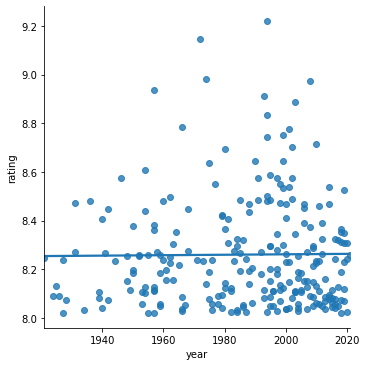

In [43]:
sns.lmplot(x ="year", y ="rating", data = dum_dir, order = 1, ci = None)
